# AI & ML Internship — Task 3
## Exploratory Data Analysis (EDA)

### Objective:
- Understand data distribution and patterns
- Analyze numerical and categorical features
- Detect outliers
- Study feature relationships using correlation
- Identify important features for prediction


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)


In [4]:
# Load Netflix dataset
netflix = pd.read_csv("netflix_titles.csv")

# Load Iris dataset
iris = pd.read_csv("Iris (1).csv")

print("Netflix Dataset Shape:", netflix.shape)
print("Iris Dataset Shape:", iris.shape)


Netflix Dataset Shape: (8807, 12)
Iris Dataset Shape: (150, 6)


In [5]:
# Netflix dataset overview
netflix.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# Iris dataset overview
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Dataset information
netflix.info()
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLength

<Figure size 800x500 with 0 Axes>

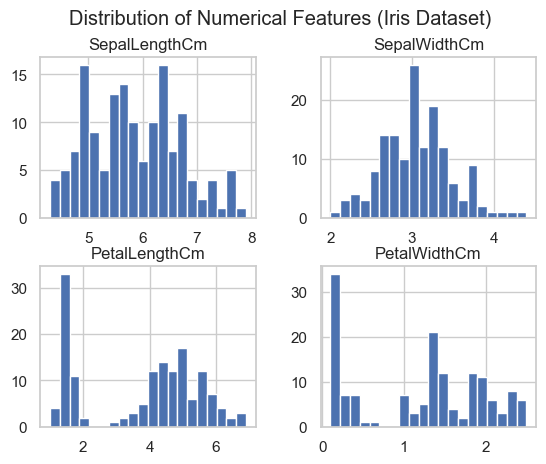

In [15]:
plt.figure(figsize=(8,5))
iris.drop(columns=["Id"]).hist(bins=20)
plt.suptitle("Distribution of Numerical Features (Iris Dataset)")
plt.savefig("images/iris_histogram.png", bbox_inches="tight")
plt.show()


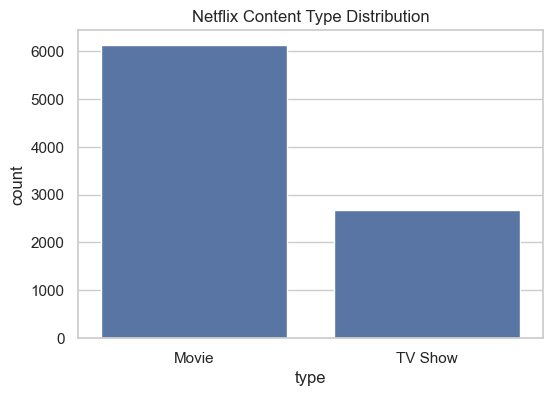

In [17]:
# Count plot for content type (Movie vs TV Show)
plt.figure(figsize=(6,4))
sns.countplot(data=netflix, x="type")
plt.title("Netflix Content Type Distribution")
plt.savefig("images/netflix_type.png", bbox_inches="tight")
plt.show()



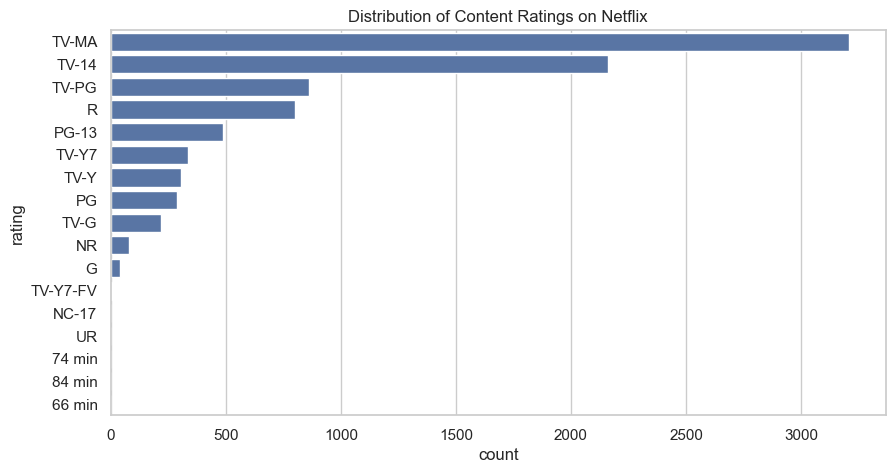

In [10]:
# Count plot for ratings
plt.figure(figsize=(10,5))
sns.countplot(data=netflix, y="rating", order=netflix["rating"].value_counts().index)
plt.title("Distribution of Content Ratings on Netflix")
plt.show()


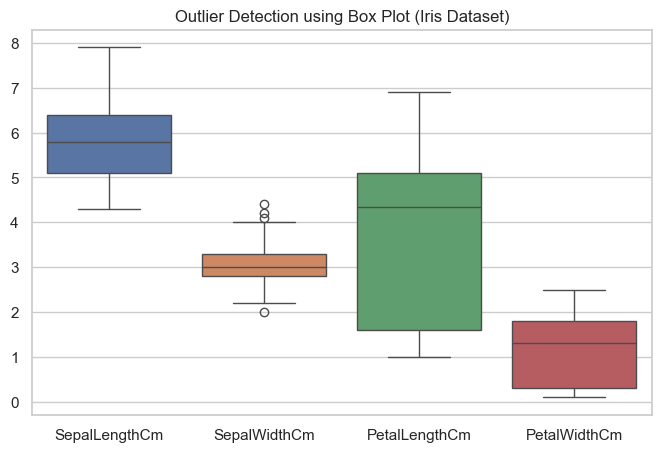

In [16]:
# Box plots to detect outliers in Iris dataset
plt.figure(figsize=(8,5))
sns.boxplot(data=iris.drop(columns=["Id", "Species"]))
plt.title("Outlier Detection using Box Plot (Iris Dataset)")
plt.savefig("images/iris_boxplot.png", bbox_inches="tight")
plt.show()



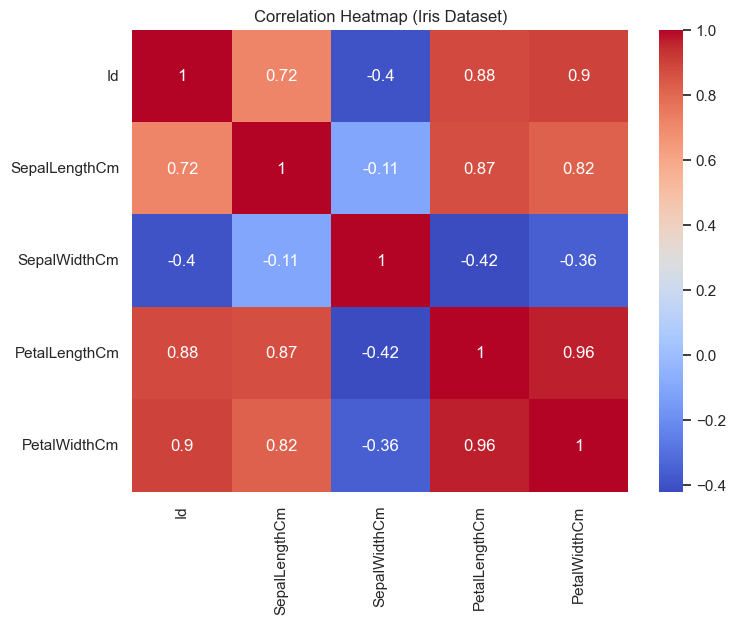

In [14]:
# Select only numerical columns for correlation
iris_numeric = iris.select_dtypes(include=["int64", "float64"])

# Correlation matrix
corr_matrix = iris_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Iris Dataset)")
plt.savefig("images/iris_correlation.png", bbox_inches="tight")
plt.show()
